In [18]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [26]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
X.replace(' ?', pd.NA, inplace=True)
X.dropna(inplace=True)
y=y.loc[X.index].copy()

categorical_features = X.select_dtypes(include=['object']).columns
X_encoded= pd.get_dummies(X,drop_first=True)


numerical_features= ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

label_encoder= LabelEncoder()
y= label_encoder.fit_transform(y)

X_train, X_test, y_train,y_test = train_test_split(X_encoded,y, test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
X_encoded

(38096, 100)
(9525, 100)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.026501,-1.062924,1.132729,0.144629,-0.217456,-0.048943,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0.837781,-1.008031,1.132729,-0.145735,-0.217456,-2.251188,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-0.047252,0.245517,-0.424726,-0.145735,-0.217456,-0.048943,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,1.059039,0.426206,-1.203454,-0.145735,-0.217456,-0.048943,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,-0.784780,1.408394,1.132729,-0.145735,-0.217456,-0.048943,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,-0.416016,0.525573,1.132729,-0.145735,-0.217456,-0.048943,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48837,0.026501,0.243367,1.132729,-0.145735,-0.217456,-0.375201,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48839,-0.047252,1.754843,1.132729,-0.145735,-0.217456,0.766703,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,0.395264,-1.002537,1.132729,0.582847,-0.217456,-0.048943,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))

[0 0 2 ... 0 2 1]
<class 'numpy.ndarray'>


In [28]:
print(knn.score(X_test, y_test))

0.5556955380577427


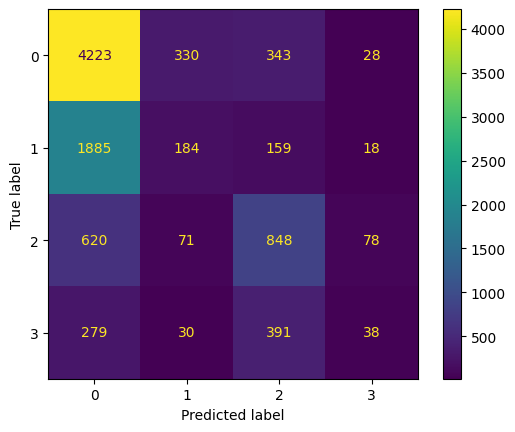

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [31]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=6)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.fit_transform(X_test)

model = LogisticRegression(random_state=42).fit(X_train_svd, y_train)

model.score(X_test_svd, y_test)

0.5510761154855643

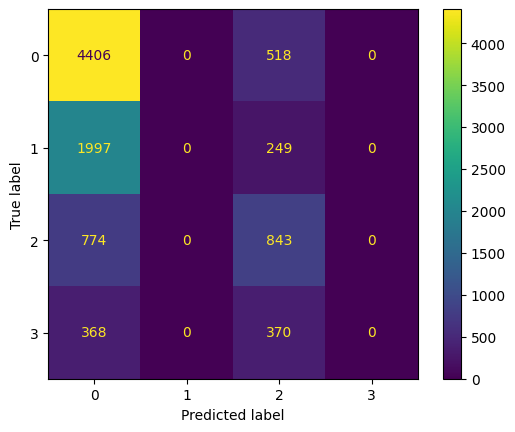

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_svd, y_test)

How did it influence the performance? Why do you think that is?


The influence was a bit worse but im not exaclty sure if what i did above was correct but seeing the results the scores were different and the model you could see some differneces. I think it made it a bit worse in my opinion is becasue truncated is simpllyfying the data which i guess can make the data lose some values that could be affecting the KNN to have a better score. 